<a href="https://colab.research.google.com/github/ajay8466/OIBSIP/blob/main/unveiling_the_android_app_market_analyzing_google_play_store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
apps_with_duplicates = pd.read_csv('/content/apps.csv.zip')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ', len(apps))
apps.sample(5)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6917,7979,CV-Library Job Search,BUSINESS,4.4,6997,4.6,"100,000+",Free,0,Everyone,Business,"July 6, 2018",6.8.0,4.1 and up
7800,8919,Bible du Semeur-BDS (French),BOOKS_AND_REFERENCE,4.5,313,6.9,"50,000+",Free,0,Everyone,Books & Reference,"August 4, 2018",0.7,1.0 and up
8775,9929,EU Brazil Green Business Forum,PRODUCTIVITY,NaN,0,8.7,10+,Free,0,Everyone,Productivity,"April 18, 2017",1.7.1,2.1 and up
5845,6877,StartPage Private Search,LIFESTYLE,4.6,10198,2.2,"100,000+",Free,0,Everyone,Lifestyle,"August 21, 2017",1.1,2.1 and up
3983,4924,Ac remote control,TOOLS,3.7,822,5.0,"50,000+",Free,0,Everyone,Tools,"February 27, 2017",1.1,2.3 and up


In [ ]:
chars_to_remove = ['+', ',','$']
cols_to_clean = ['Installs','Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [ ]:
import numpy as np
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
print(apps.dtypes)


Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values,
)]

plotly.offline.iplot(data)

Number of categories =  33


In [ ]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})


Average app rating =  4.173243045387994


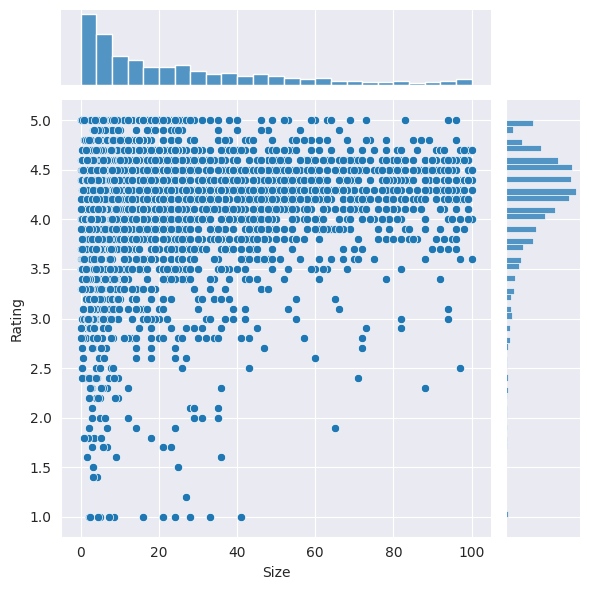

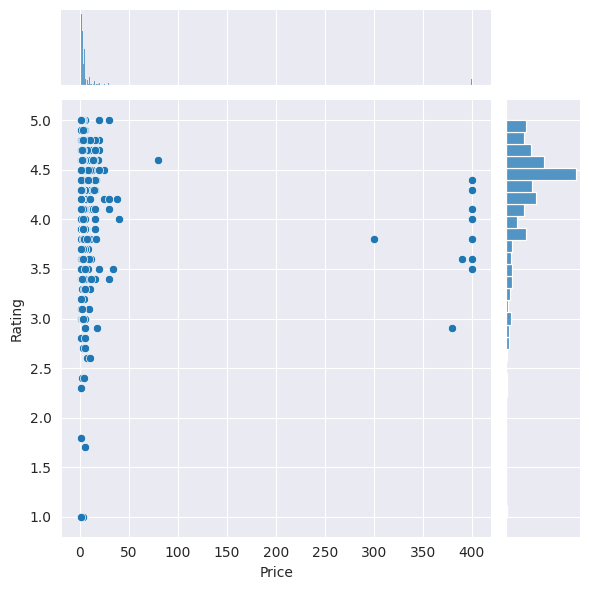

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[(apps['Rating'].isnull() == False) & (apps['Size'].isnull() == False)]

large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


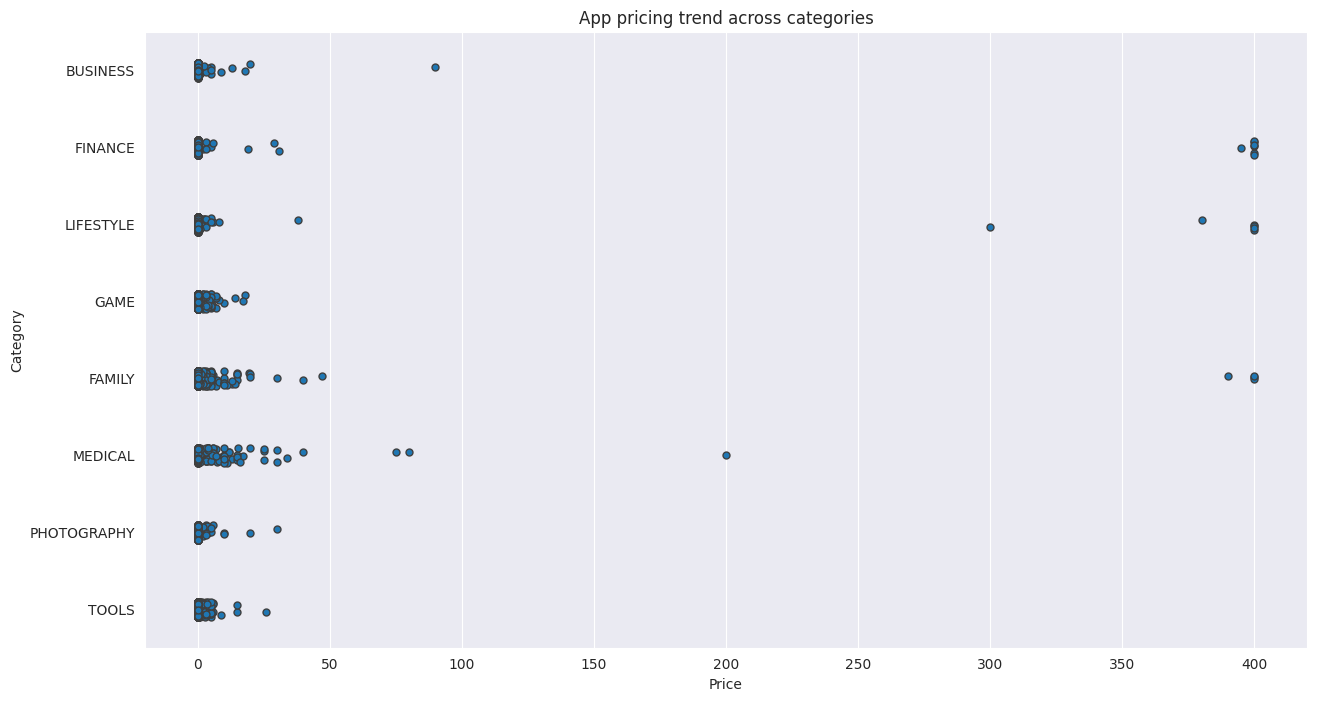

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

popular_app_cats['Price'] = popular_app_cats['Price'].replace('\n', '')
popular_app_cats['Price'] = popular_app_cats['Price'].astype('float')

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

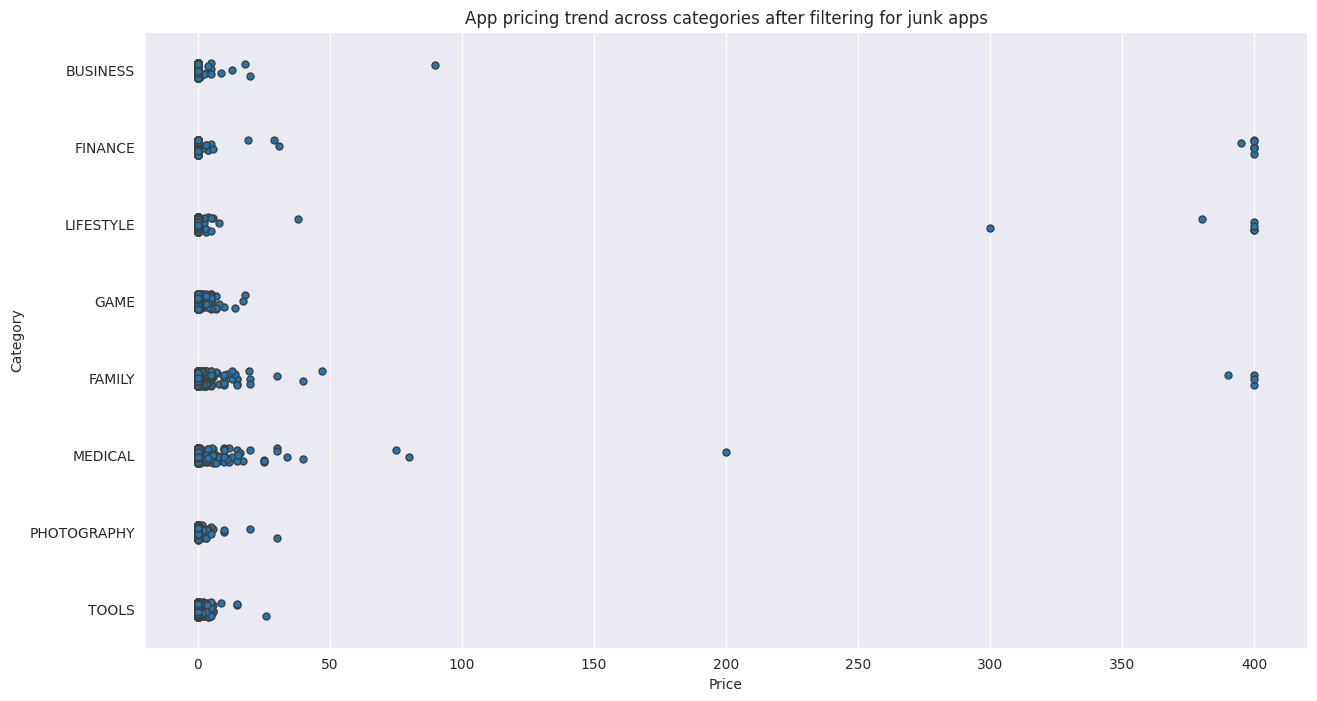

In [ ]:
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], data = apps, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [ ]:
apps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [ ]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

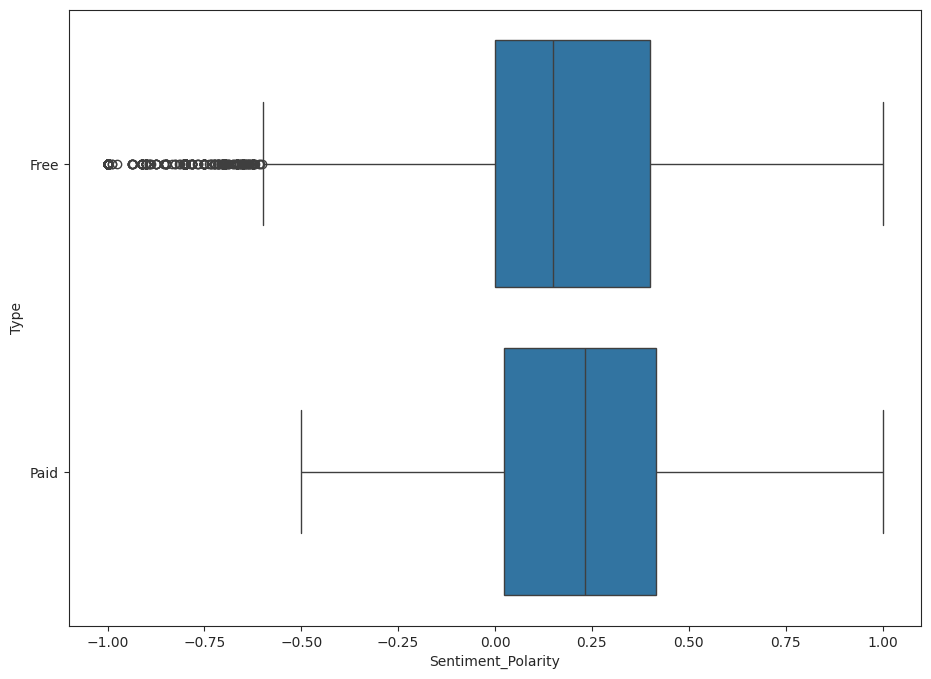

In [ ]:
reviews_df = pd.read_csv('/content/user_reviews.csv.zip')

merged_df = pd.merge(apps,reviews_df,on='App')

merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Sentiment_Polarity', y = 'Type', data = merged_df)